In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Data = pd.read_csv("bebe.csv")
df = pd.DataFrame(data = Data)
print(df.describe())
mydf = df.drop('X', axis=1)
print(mydf.head())

ageMedian = np.median(mydf['age'])
print("La mediane de l'age est : ", ageMedian)

bwtMedian = np.median(mydf['bwt'])
print("La mediane de bwt est : ", bwtMedian)

gestationMedian = np.median(mydf['gestation'])
print("La mediane de gestation est : ", gestationMedian)

parityMedian = np.median(mydf['parity'])
print("La mediane du parity est : ", parityMedian)

#Les valeurs medianes pour les variables quantitatives sont les suivantes:
#Age: 26 - proche de la valeur reel
#Bwt: 3401.94 
#Gestation: 280 - exactement la valeur reel
#weight: 56.7 - faux, la valeur reel est 77
#height: 162 - proche de la valeur reel (161)

heightMedian = np.median(mydf['height'])
print("La mediane de height est : ", heightMedian)

weightMedian = np.median(mydf['weight'])
print("La mediane de weight est : ", weightMedian)

smokeMedian = np.median(mydf['smoke'])
print("La mediane de smoke est : ", smokeMedian)

#Les modalites les plus representees pour les variables qualitatives sont les suivantes: 
#Parity: 0
#Smoke: 0

#Variables quantitatives: Age, Bwt, Gestation, height, weight
#Variables qualitatives: Parity, Smoke
#Modalites les plus representees pour les variables qualitatives: parity et smoke
#Valeur reel de parity: 2,27 fils/filles par femme
#Valeur reel de smoke: 0,074 fumeuses pendant la grossesse


                 X          bwt    gestation       parity          age  \
count  1174.000000  1174.000000  1174.000000  1174.000000  1174.000000   
mean    587.500000  3386.702747   279.101363     0.262351    27.228279   
std     339.048915   519.608671    16.010305     0.440100     5.817839   
min       1.000000  1559.222500   148.000000     0.000000    15.000000   
25%     294.250000  3061.746000   272.000000     0.000000    23.000000   
50%     587.500000  3401.940000   280.000000     0.000000    26.000000   
75%     880.750000  3713.784500   288.000000     1.000000    31.000000   
max    1174.000000  4989.512000   353.000000     1.000000    45.000000   

            height       weight        smoke  
count  1174.000000  1174.000000  1174.000000  
mean    162.685486    58.276913     0.390971  
std       6.416298     9.404905     0.488176  
min     134.620000    39.462504     0.000000  
25%     157.480000    51.822886     0.000000  
50%     162.560000    56.699000     0.000000  
75% 

In [3]:
print(np.isnan(mydf).sum())

bwt          0
gestation    0
parity       0
age          0
height       0
weight       0
smoke        0
dtype: int64


Il n'y a pas des valeurs manquants dans le dataset.
Y-a-t-il des valeurs manquantes? Pourquoi cela peut-il être un problème pour l’entraînement du modèle?
Il n'y a pas de valeurs manquantes. Cela peut etre un probleme pour l'entrainement du modele car les valeurs manquantes peuvent affecter la performance du modele.

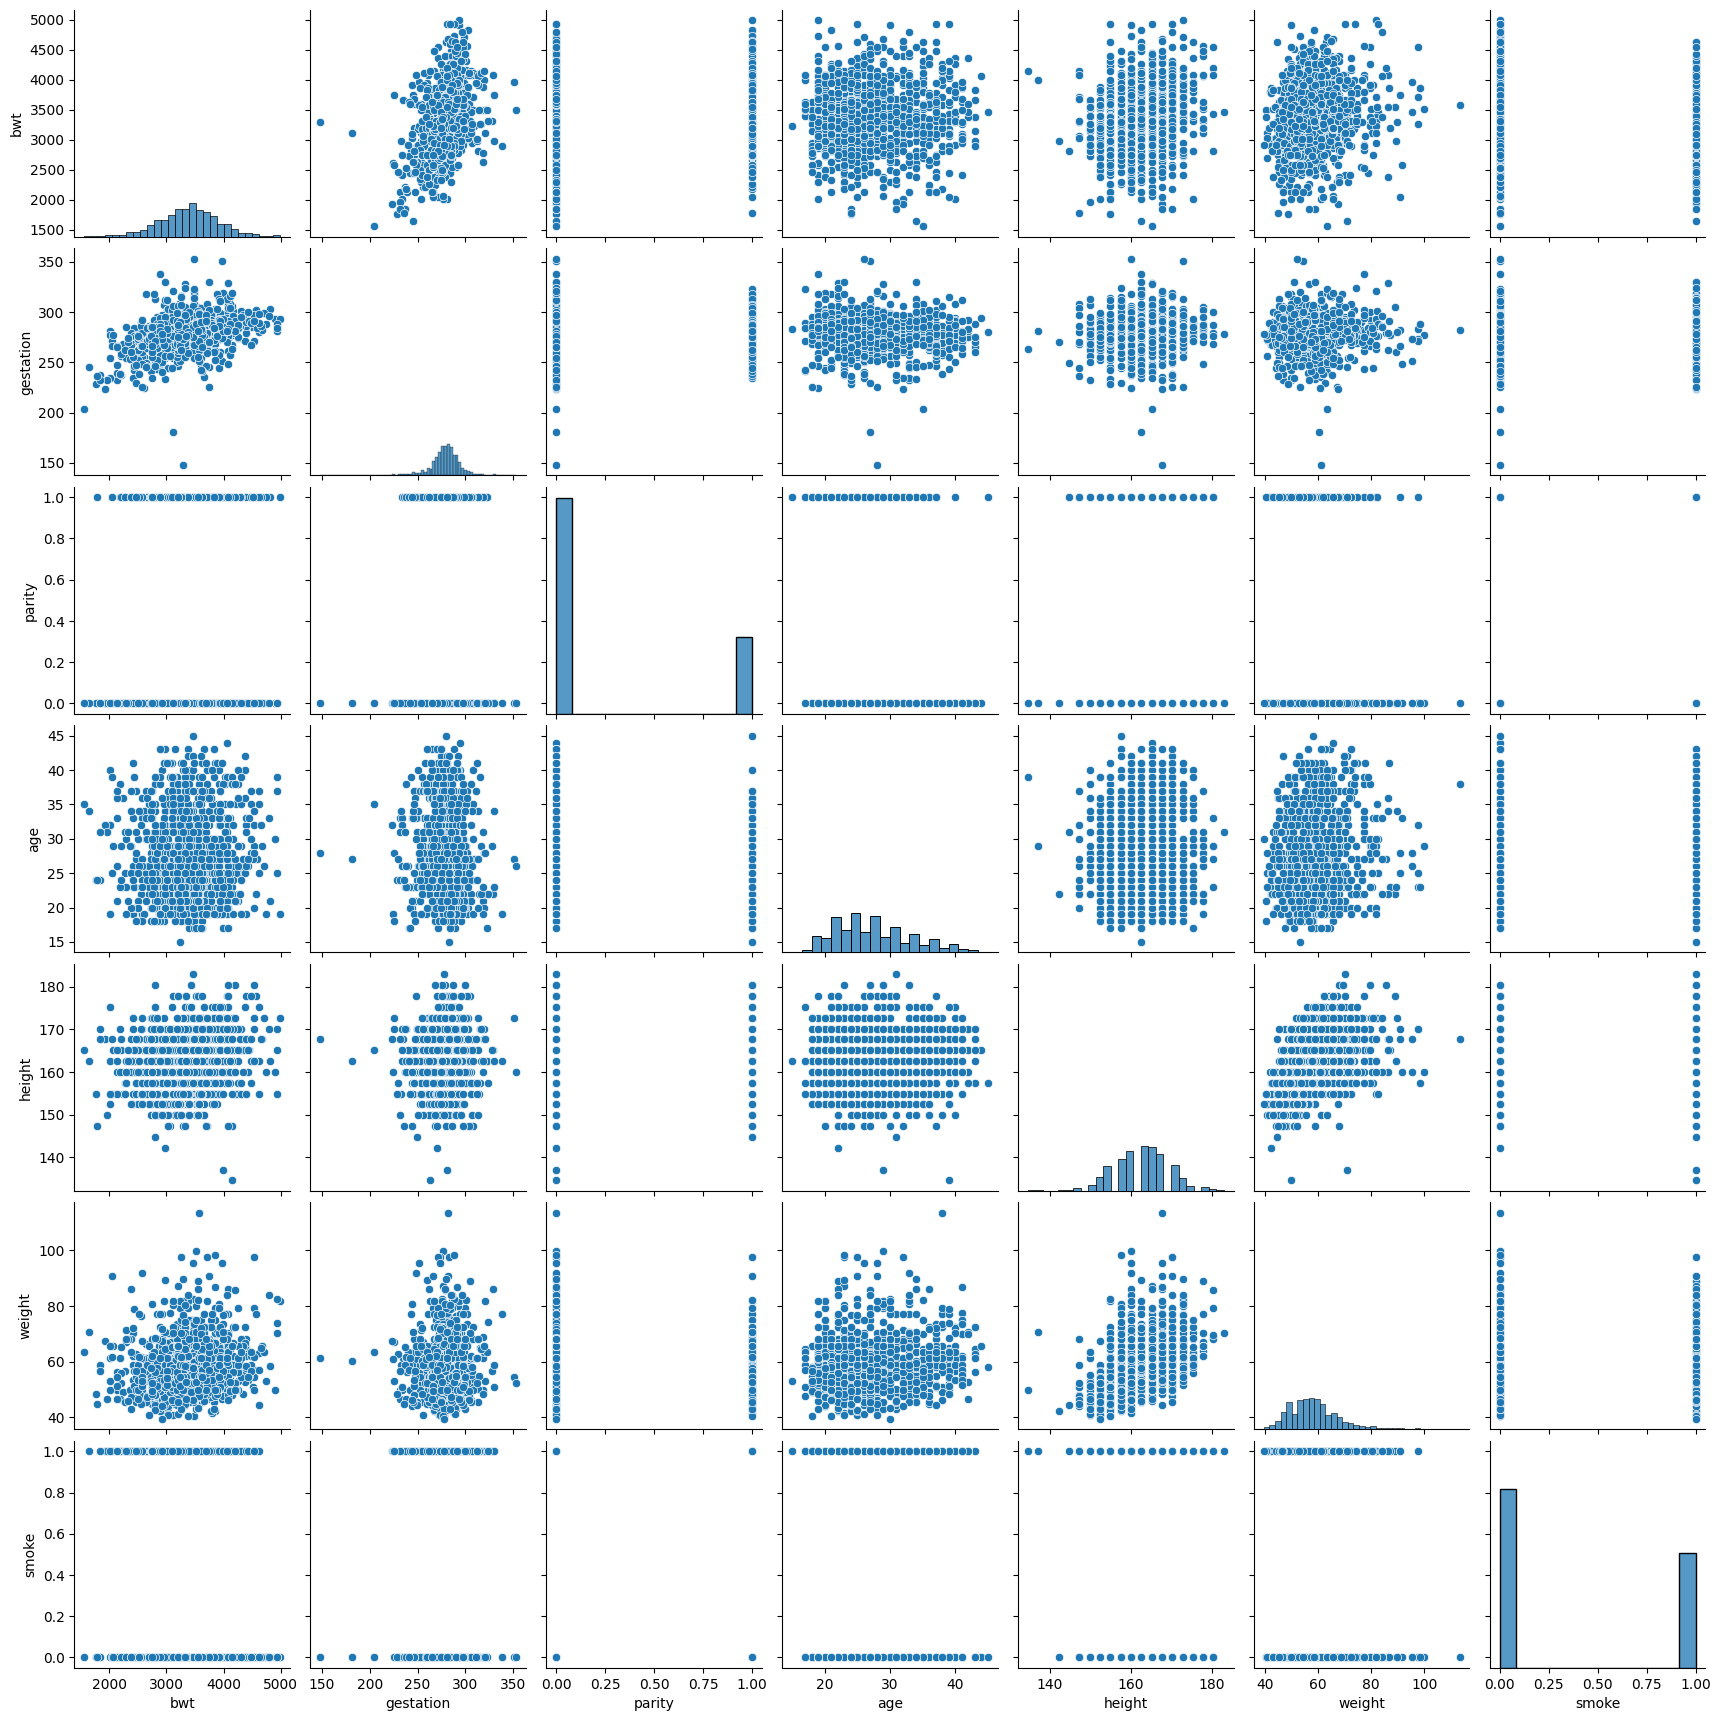

In [4]:
#create pairs plot for all numeric variables
sns.pairplot(mydf)
plt.show()

In [5]:
#Calculer les coefficients de correlation entre les variables quantitatives
correlation = mydf.corr()
print(correlation)

                bwt  gestation    parity       age    height    weight  \
bwt        1.000000   0.407543 -0.043908  0.026983  0.203704  0.155923   
gestation  0.407543   1.000000  0.080916 -0.053425  0.070470  0.023655   
parity    -0.043908   0.080916  1.000000 -0.351041  0.043543 -0.096362   
age        0.026983  -0.053425 -0.351041  1.000000 -0.006453  0.147322   
height     0.203704   0.070470  0.043543 -0.006453  1.000000  0.435287   
weight     0.155923   0.023655 -0.096362  0.147322  0.435287  1.000000   
smoke     -0.246800  -0.060267 -0.009599 -0.067772  0.017507 -0.060281   

              smoke  
bwt       -0.246800  
gestation -0.060267  
parity    -0.009599  
age       -0.067772  
height     0.017507  
weight    -0.060281  
smoke      1.000000  


Les plus fortes correlations sont entre bwt-gestation et weight-height
Il n'y a pas des correlations tres faibles
Il y a plus de meres non fumeuses que fumeuses

In [ ]:
#Il y a t-il plus de meres fumeuses que non fumeuses?
smoke = mydf['smoke'].value_counts()
print(smoke)

smoke
0    715
1    459
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_data = mydf.iloc[:,0:6]
y_data = mydf.iloc[:,6]

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.3,random_state=42)
print("Entreinement: ", x_train.shape, y_train.shape) 
print("Test: ", x_test.shape, y_test.shape)

Entreinement:  (821, 6) (821,)
Test:  (353, 6) (353,)


In [22]:
from sklearn.tree import DecisionTreeRegressor
?DecisionTreeRegressor

Init signature:
DecisionTreeRegressor(
    *,
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minim

In [23]:
#Fit regression model
regre_1 = DecisionTreeRegressor(max_depth=2)
regre_1.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=2)

In [24]:
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
from sklearn import tree
df_feature_names = list(x_train.columns)
plt.figure(figsize=(30,10)) # set plot size (denoted in inches)
tree.plot_tree(regre_1, feature_names = df_feature_names, filled=True, fontsize=10)
plt.show()

<IPython.core.display.Javascript object>

In [26]:
y_1 = regre_1.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_1)
score = r2_score(y_test, y_1)
print("R-squared: ", score)
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))
plt.scatter(y_test, y_1)
plt.title('Y r el VS Y pr dit')
plt.xlabel('Y r el')
plt.ylabel('Y pr dit')
plt.show()

R-squared:  0.2216432399460483
MSE:  234696.44258601367
RMSE:  484.45478900101057


<IPython.core.display.Javascript object>

In [27]:
#Donnez la formule pour calculer manuellement le R^2 et la MSE. Retrouvez les resultats obtenus avec sklearn
#R^2 = 1 - (SSE/SST)
#MSE = SSE/n
#SSE = sum((y_test - y_1)^2)
#SST = sum((y_test - y_test_mean)^2)
#y_test_mean = mean(y_test)
#n = nombre d'observations

SSE = sum((y_test - y_1)**2)
SST = sum((y_test - np.mean(y_test))**2)
n = len(y_test)
R2 = 1 - (SSE/SST)
MSE = SSE/n
print("R-squared: ", R2)
print("MSE: ", MSE)

R-squared:  0.2216432399460484
MSE:  234696.44258601367


In [ ]:
#Compute the R2 from training and R2 from testing
y_2 = regre_1.predict(x_train)
SSE_train = sum((y_train - y_2)**2)
SST_train = sum((y_train - np.mean(y_train))**2)
n_train = len(y_train)
R2_train = 1 - (SSE_train/SST_train)
MSE_train = SSE_train/n_train
print("R-squared train: ", R2_train)
print("MSE train: ", MSE_train)

#Compare les R2 et MSE de training et testing. Is there overfitting or underfitting?
#R2_train = 0.2
#R2_test = 0.22
#MSE_train = 203132
#MSE_test = 234696

#Les valeurs de R2 et MSE sont tres proches pour les donnees d'entrainement et de test.
#Cela signifie que le modele ne souffre ni de surajustement ni de sous-ajustement.
#Il n'y a pas de surajustement ou de sous-ajustement.


R-squared train:  0.20680641973201364
MSE train:  203132.2658167801


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
myData = pd.read_csv("titanic.csv")
print(myData.head())

   rownames      class     age  sex survived
0         1  1st class  adults  man      yes
1         2  1st class  adults  man      yes
2         3  1st class  adults  man      yes
3         4  1st class  adults  man      yes
4         5  1st class  adults  man      yes


Il n'y a pas des variables quantitatives

In [3]:
#Supprimez la variables id qui n'est pas une donee exploitable
myData = myData.drop('rownames', axis=1)
print(myData.head())

       class     age  sex survived
0  1st class  adults  man      yes
1  1st class  adults  man      yes
2  1st class  adults  man      yes
3  1st class  adults  man      yes
4  1st class  adults  man      yes


In [ ]:
#Quelles sont les variables binaires et quelles sont les variables à plus de deux modalités? Utilisez la fonction describe() pour répondre à cette question.
d = myData.describe(include='all')
print(d)

#Les variables binaires sont: sex, survived, age
#Les variables à plus de deux modalités sont: class

            class     age   sex survived
count        1316    1316  1316     1316
unique          3       2     2        2
top     3rd class  adults   man       no
freq          706    1207   869      817


In [5]:
myData_bin = pd.get_dummies(myData, columns=['class','age','sex'])
X,y = myData_bin.loc[:, myData_bin.columns!='survived'], myData_bin['survived']
print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.7,random_state=0)

   class_1st class  class_2nd class  ...  sex_man  sex_women
0             True            False  ...     True      False
1             True            False  ...     True      False
2             True            False  ...     True      False
3             True            False  ...     True      False
4             True            False  ...     True      False

[5 rows x 7 columns]


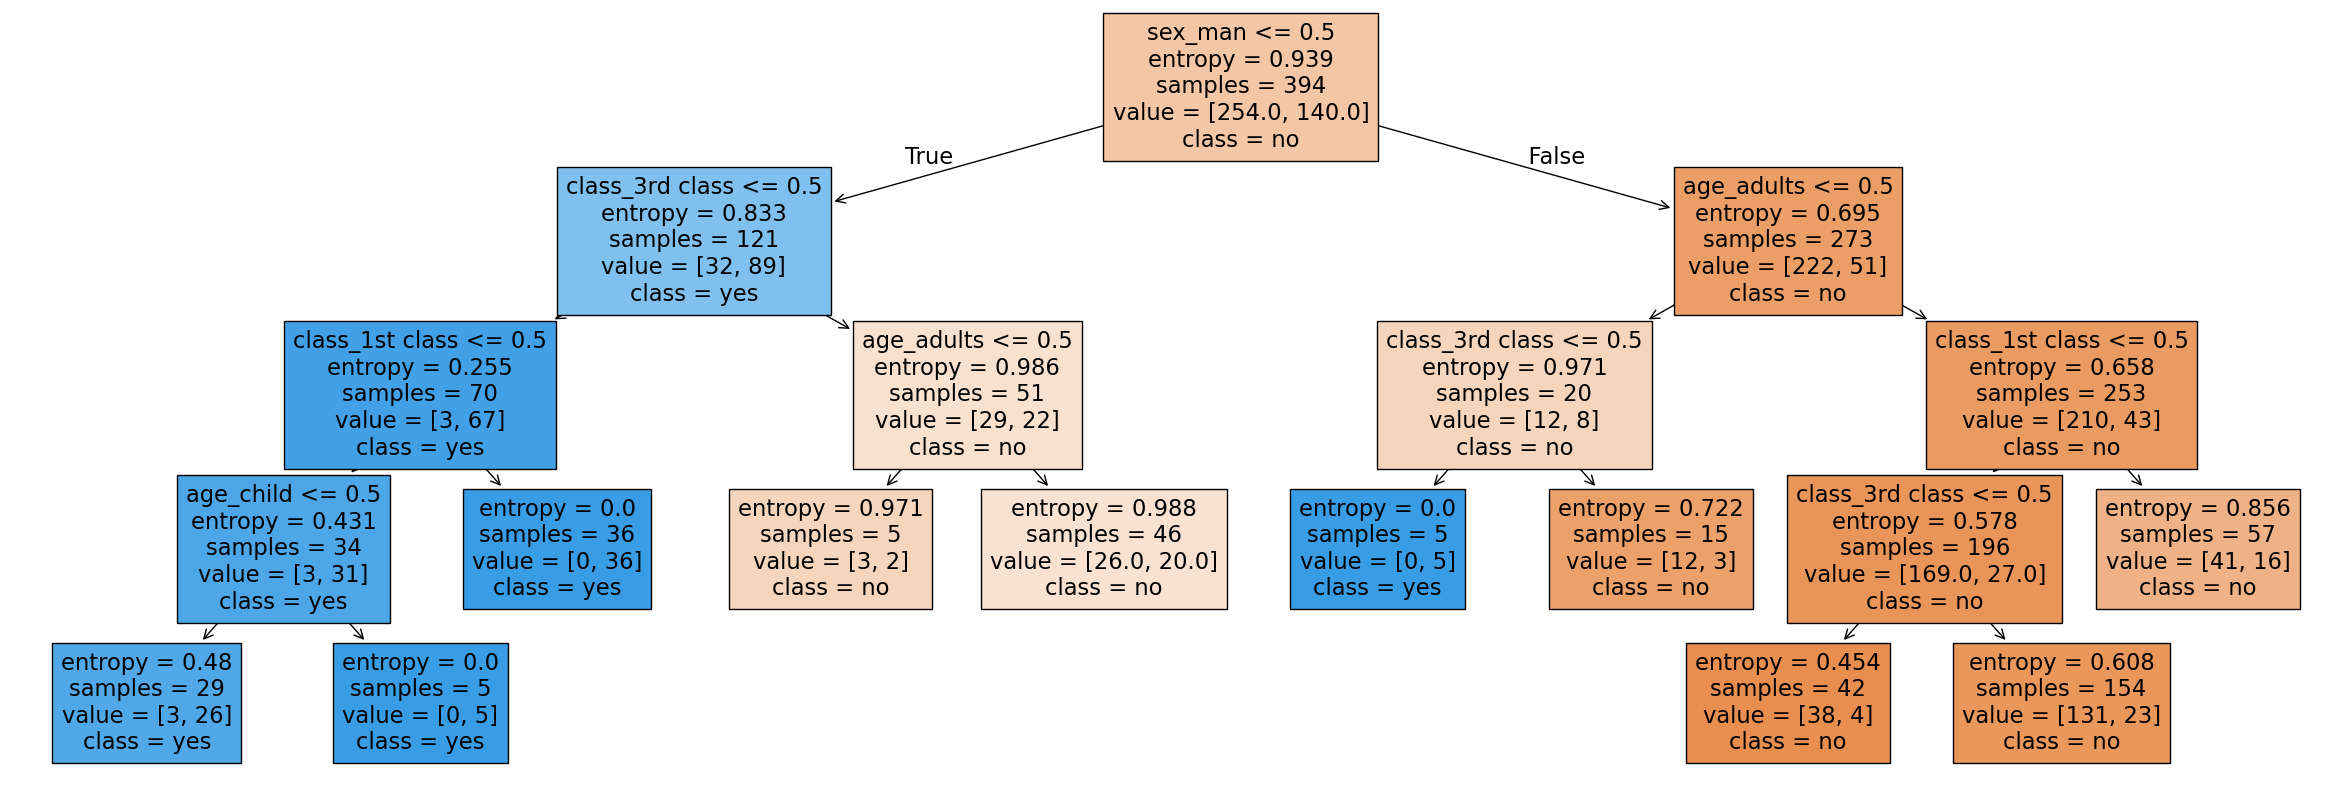

In [8]:
from sklearn import tree
import matplotlib.pyplot as plt
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
cn = ['no', 'yes']
dt_feature_names = list(X.columns)
#plot tree
plt.figure(figsize=(30,10)) # set plot size (denoted in inches)
plot_tree_cor = tree.plot_tree(clf, filled=True, feature_names = dt_feature_names, class_names=cn,)
plt.show()

a)Pourquelle raison certain noeuds terminaux peuvent avoir une entropie nulle?

Response: L'entropie est nulle lorsque tous les exemples d'un noeud terminal appartiennent à la même classe.

b)Quel noeud terminal a le plus grand échantillon? Quelle est la prédiction associée?

Response: Le noeud terminal avec le plus grand échantillon est le noeud racine, qui a 394 exemples et la prédiction associée est sex_man<=0.5.

c) Quelle sera la prédiction (classe et probabilité) pour un petit garçon de seconde classe?

Response: La prediction sera 0 (no) avec une probabilité de 0.5.

d)La 2ème classe a-t-elle privilégié les femmes et les enfants d’abord? La 1ère? La 3ème?

Response: La 2ème classe a privilégié les femmes et les enfants d'abord, la 1ère classe a également privilégié les femmes et les enfants, tandis que la 3ème classe n'a pas privilégié les femmes et les enfants.

e) Donnez la formule mathématique de calcule de l’entropie de Shannon

Response: H(X) = -sum(p(x) * log2(p(x))) où p(x) est la probabilité de chaque classe x dans l'ensemble de données.

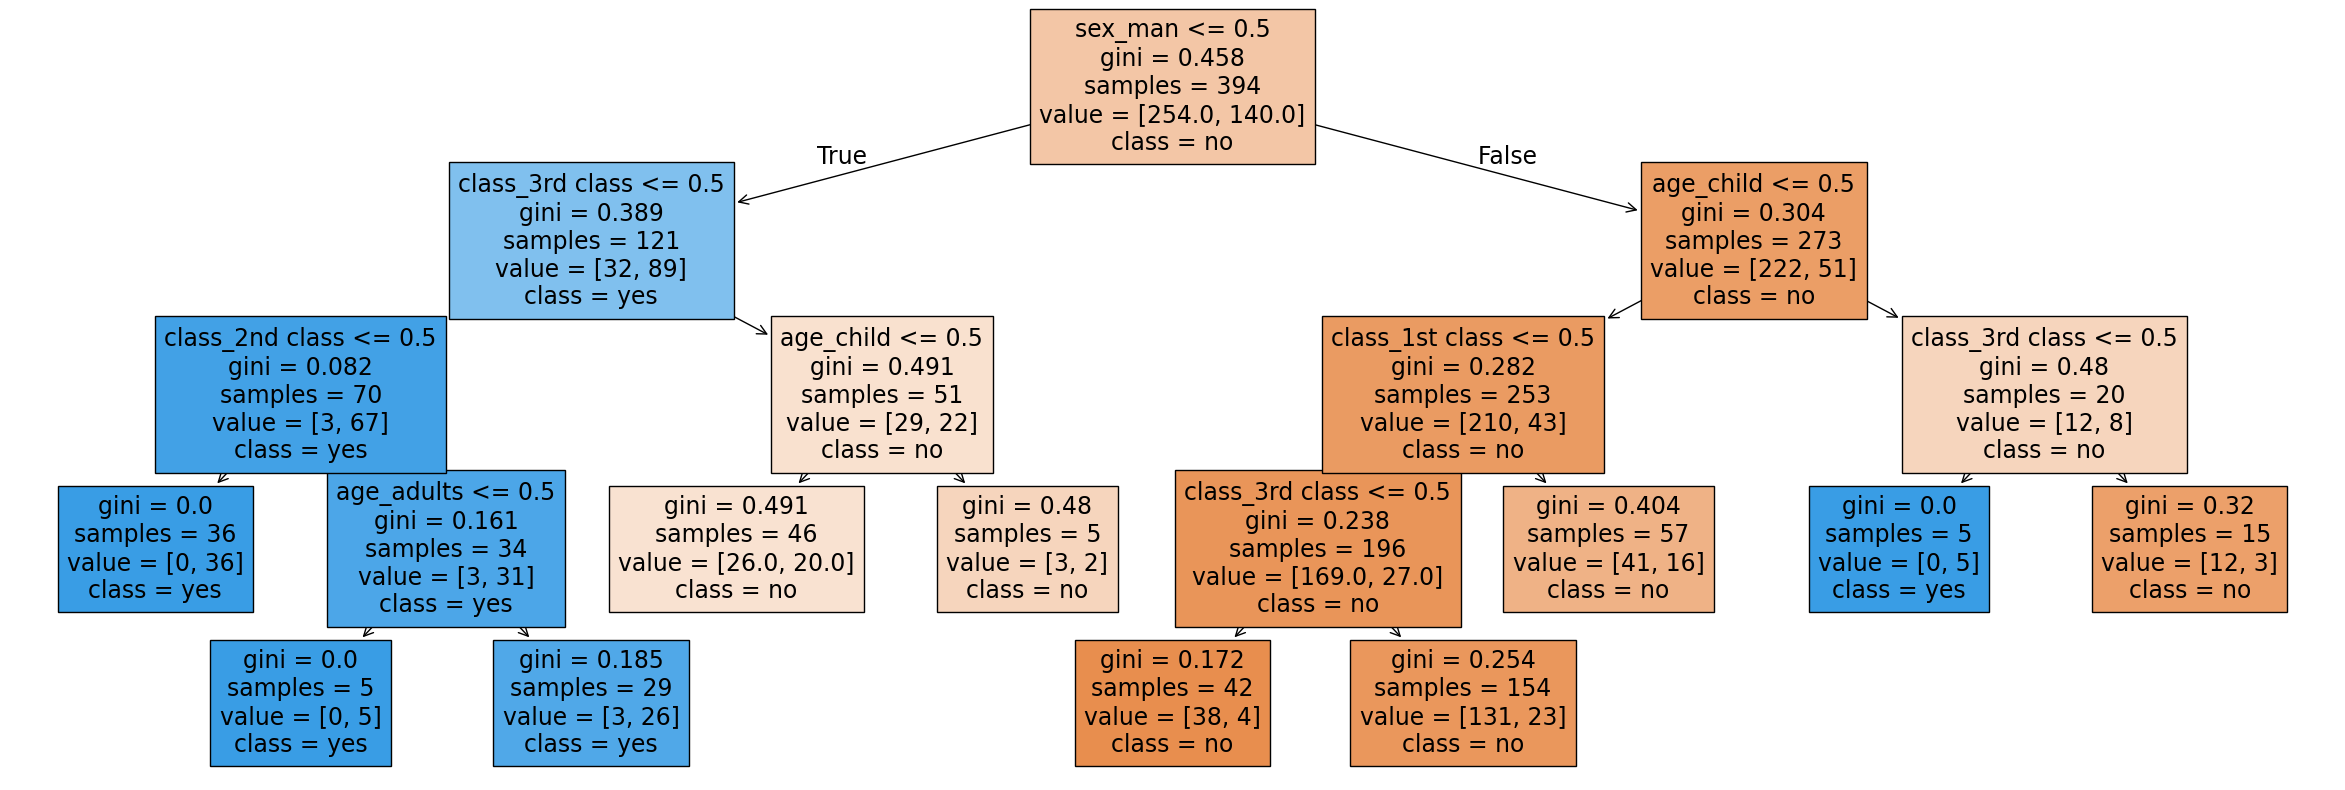

In [26]:
#Construisez un arbre basé sur l’indice de Gini et comparez votre modèle au précédent, en regardant notamment les quatre question précédentes.
clf = tree.DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)
cn = ['no', 'yes']
#plot tree
plt.figure(figsize=(30,10)) # set plot size (denoted in inches)
plot_tree_cor = tree.plot_tree(clf, filled=True, feature_names = dt_feature_names, class_names=cn,)
plt.show()
#Comparez les deux arbres. Quelles sont les différences? Quelles sont les variables les plus importantes?
#Les deux arbres sont differents.
#L'ordre des variables est different.

Quels sont les autres paramètres possibles de la fonction DecisionTreeClassifier?
Les autres parametres possibles de la fonction DecisionTreeClassifier sont:

max_depth, min_samples_split, min_samples_leaf, max_features, random_state, class_weight, splitter, max_leaf_nodes, min_weight_fraction_leaf, max_leaf_nodes, ccp_alpha


Donnez la formule mathématique de calcule du coefficient de Gini
Gini = 1 - sum(p_i^2)
p_i = proportion de la classe i

In [ ]:
#Que reste-il à faire pour évaluer la qualité de notre modèle?
#Il faut evaluer la qualite du modele en utilisant les donnees de test.
#Il faut aussi evaluer la qualite du modele en utilisant les donnees d'entrainement.
#Il faut evaluer la qualite du modele en utilisant les donnees de validation.

#Evaluer la qualité du modèle en utilisant les données de test
from sklearn.metrics import confusion_matrix 
y_pred = clf.predict(X_test)
print("Prediction: ", y_pred)
print("Real: ", y_test.values)
print("Confusion matrix: ", confusion_matrix(y_test, y_pred))
   

Prediction:  ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'yes' 'no' 'yes' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no'
 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes'
 'yes' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'yes' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'no' 'no' 'no' 'no' 'no'
 'yes' 'no' 'no' 'no' 'no' 'yes' 'no' 'yes' 'no' 'no' 'yes' 'no' 'no'
 'yes' 'no' 'no' 'yes' 'no' 'no' 'yes' 'no' '

[[549  14]
 [181 178]]


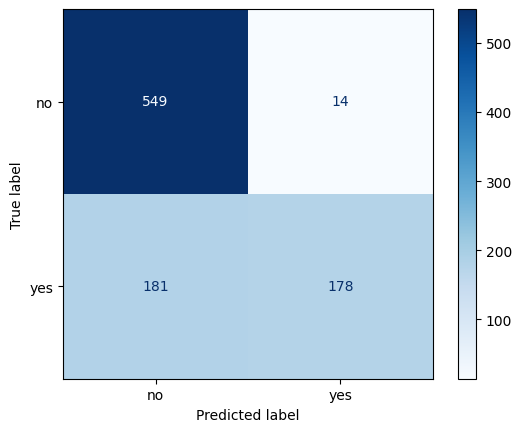

In [18]:
#Version simple
cm = confusion_matrix(y_test, clf.predict(X_test))
print(cm)

#Version plus jolie
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [27]:
#Calculer le taux de bonne classification
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

#Combine de 'survivants' ont ete classe comme 'morts'?

faux_survivant = cm[0][1]
print("Faux survivants: ", faux_survivant)

#Quelle erreur commet majoritairement le modèle?
#Le modele commet majoritairement l'erreur de classer les survivants comme morts.

# A l'aide de la librairie sklearn.metrics, calculez la Hinge Loss et la Log Loss des deux modeles(Entropie et Gini).
from sklearn.metrics import log_loss, hinge_loss
log_loss_1 = log_loss(y_test, clf.predict_log_proba(X_test))
hinge_loss_1 = hinge_loss(y_test, clf.predict_proba(X_test))
print("Log loss: ", log_loss_1)
print("Hinge loss: ", hinge_loss_1)

Accuracy:  0.7885032537960954
Faux survivants:  14


C:\Users\popst\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\tree\_classes.py:1089: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


ValueError: Input contains infinity or a value too large for dtype('float64').

In [28]:
#Comparez la matrice de confusion des deux modeles.

cm_1 = confusion_matrix(y_test, clf.predict(X_test))
cm_2 = confusion_matrix(y_test, clf.predict(X_test))
print("Matrice de confusion du modele 1: ", cm_1)
print("Matrice de confusion du modele 2: ", cm_2)

Matrice de confusion du modele 1:  [[549  14]
 [181 178]]
Matrice de confusion du modele 2:  [[549  14]
 [181 178]]
